Close	Amplitude	Turnover	K_volume	macd2	hma10	hma20	hma60	ichimoku1	ichimoku2	ichimoku3	ichimoku4	ichimoku5	rsi	twf_feat
Change	

绘制从0到1000的图形


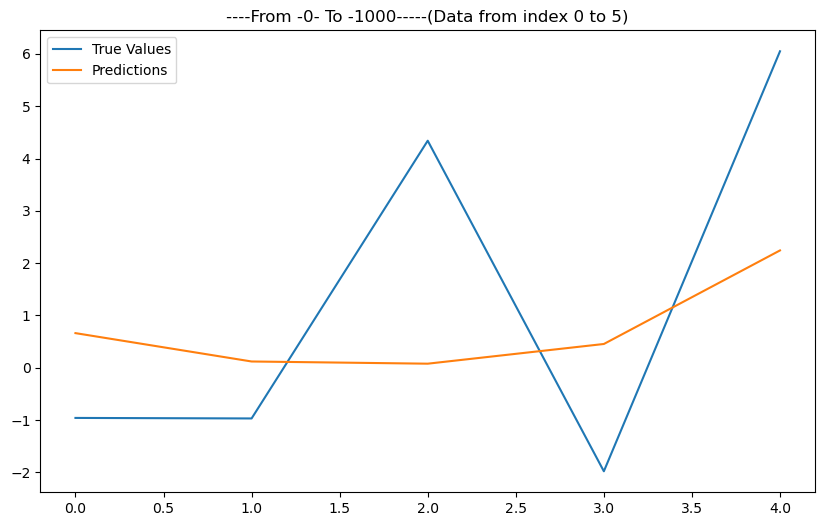

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 folder_path 是包含文件的目录
folder_path = './'

# 加载文件
metrics = np.load(f'{folder_path}metrics.npy')
predictions = np.load(f'{folder_path}pred.npy')
true_values = np.load(f'{folder_path}true.npy')
# 指定样本索引
sample_index = 0  # 更改这个索引来查看不同的样本

# 获取需要列的预测和真实数据
n = 0
n_pred = predictions[0, :, n]
n_true = true_values[0, :, n]



# 选择绘制的数据量
num_points_to_plot = 1000 # 例如，绘制前500个点
print(f'绘制从{sample_index}到{num_points_to_plot}的图形')

# 确保sample_index加上num_points_to_plot不会超过数组的长度
end_index = min(sample_index + num_points_to_plot, len(n_pred))

plt.figure(figsize=(10, 6)) # 设置图形大小
plt.plot(n_true[sample_index:end_index], label='True Values')
plt.plot(n_pred[sample_index:end_index], label='Predictions')
plt.title(f'----From -{sample_index}- To -{num_points_to_plot}-----(Data from index {sample_index} to {end_index})')
plt.legend()
plt.show()

MAE: 1.3863531351089478, MSE: 12.707257270812988, RMSE: 3.5647239685058594, MAPE: 0.27667948603630066, MSPE: 0.46116819977760315


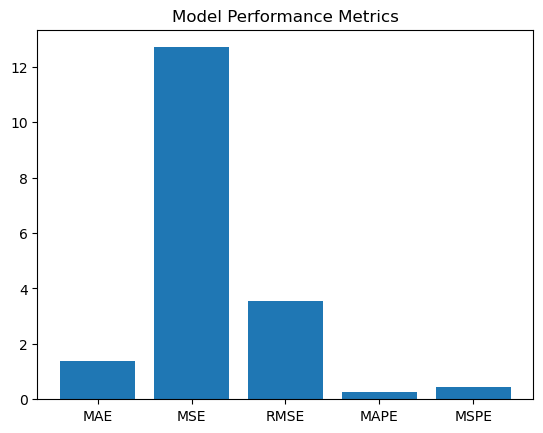

In [2]:
# 打印性能指标
print(f"MAE: {metrics[0]}, MSE: {metrics[1]}, RMSE: {metrics[2]}, MAPE: {metrics[3]}, MSPE: {metrics[4]}")

# 可视化性能指标（如果需要）
plt.bar(['MAE', 'MSE', 'RMSE', 'MAPE', 'MSPE'], metrics)
plt.title('Model Performance Metrics')
plt.show()


In [10]:
# 定义每天的百分比变化
daily_changes = [-0.96, -0.96, 4.4, -2, 6.0]

# 计算总体百分比变化的函数
def calculate_total_change(changes, start_day, end_day):
    # 总变化是通过顺序应用每天的变化计算的，
    # 从基础值100开始（代表股票的初始值）
    total_value = 100
    for change in changes[start_day-1:end_day]:
        total_value *= (1 + change / 100)
    # 然后根据最终值计算总体的百分比变化
    overall_change = ((total_value - 100) / 100) * 100
    return overall_change

# 计算从第n天（第1天）到n+5天（第5天）的总变化
total_change = calculate_total_change(daily_changes, 1, 5)
total_change


6.378460994355209